In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize
from scipy.stats import linregress
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('true_car_listings_prepeared.csv')
df

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725.0,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,NaN,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851.0,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922.0,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,0,2016,NaN,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic
...,...,...,...,...,...,...,...,...
852117,63215,2017,9.0,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6
852118,72260,2017,3201.0,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6
852119,55999,2016,28941.0,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD
852120,60240,2017,3005.0,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90


In [2]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Price    852122 non-null  int64  
 1   Year     852122 non-null  int64  
 2   Mileage  731179 non-null  float64
 3   City     852122 non-null  object 
 4   State    852122 non-null  object 
 5   Vin      852122 non-null  object 
 6   Make     852122 non-null  object 
 7   Model    775000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 52.0+ MB


ЗАДАЧИ

-- Предсказать цену машины по исходным данным.

-- Сделать анализ колонок, посмотреть сколько уникальных значений, сколько пропущенных значений, все ли значения валидны.

-- Использовать разбиение данных: 70% на тренировочные, 30% на данные для теста.

-- Определить какие колонки и как влияют на результат. Нужны ли нам все колонки из этого датасета?

-- Построить графики, показывающие зависимость года выпуска машины и её цены.

-- Метрикой выбрать RMSE.

Проведем анализ для понимания нужны ли нам какие-то данные или нет, количество уникальних значений, максимальные значения, минимальные значения 1 функцией.

In [3]:
df.describe(include = 'all')

,Price,Year,Mileage,City,State,Vin,Make,Model
count,852122.000000,852122.000000,7.311790e+05,852122,852122,852122,852122,775000
unique,NaN,NaN,NaN,2553,59,852075,58,2694
top,NaN,NaN,NaN,Houston,TX,2G1FA1E37E9293949,Ford,Silverado
freq,NaN,NaN,NaN,12703,94654,2,110432,22558
mean,20121.167199,2013.289145,5.251923e+04,NaN,NaN,NaN,NaN,NaN
std,14123.100298,3.414987,4.203614e+04,NaN,NaN,NaN,NaN,NaN
min,0.000000,1997.000000,5.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,11997.000000,2012.000000,2.383600e+04,NaN,NaN,NaN,NaN,NaN
50%,17900.000000,2014.000000,4.026500e+04,NaN,NaN,NaN,NaN,NaN
75%,26397.000000,2016.000000,7.222700e+04,NaN,NaN,NaN,NaN,NaN


Посмотрим сколько у нас пропущеных значений и в какой колонке каждая

In [4]:
s = df.isna().sum()
s = s[s != 0].sort_values(ascending=False)
s

Mileage    120943
Model       77122
dtype: int64

Теперь посмотрим все ли данные используются и какие колонки можно убрать. Можно сразу сказать что колонка vin не нужна, так как слишком много уникальных значений из которых выходит разный результат.

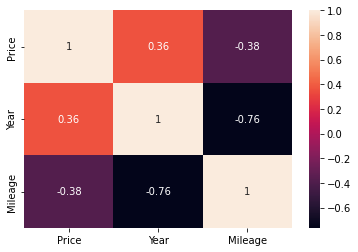

In [5]:
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot = True
           );

Как из таблицы коофицентов корреляции можно увидеть, что найболее большая взаимосвязность цены с пробегом, при чем отрицательная. И положительная - год выпуска. Чем раньше, тем дороже.

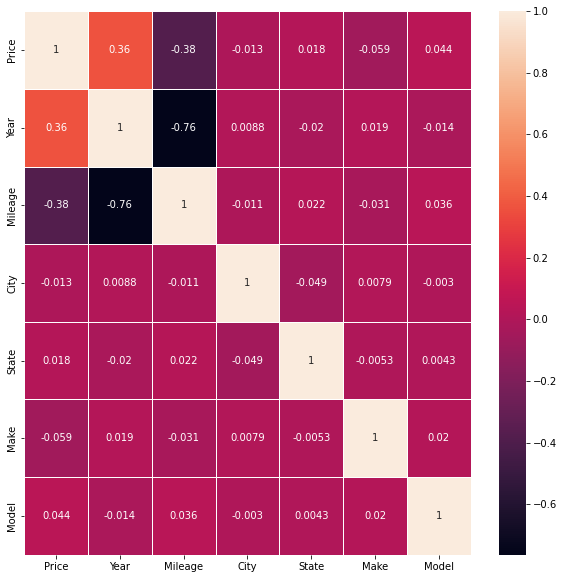

In [6]:
label_encoder = LabelEncoder()

df2 = df.copy()
df2.Make = label_encoder.fit_transform(df2.Make.tolist())
df2.Model = label_encoder.fit_transform(df2.Model.tolist())
df2.City = label_encoder.fit_transform(df2.City.tolist())
df2.State = label_encoder.fit_transform(df2.State.tolist())

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

corr = df2.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns, annot = True,
            linewidths=.5, 
            ax=ax);

У нас есть таблица кореляций, но чтобы проверить правильность, то пы посчитаем p-значение

In [7]:
from scipy.stats import pearsonr
r = pearsonr(df2['Make'], df2['Price'])
print('Make Correlation:', r[0], 'p-value:', r[1])
r = pearsonr(df2['Model'], df2['Price'])
print('Model Correlation:', r[0], 'p-value:', r[1])
r = pearsonr(df2['State'], df2['Price'])
print('State Correlation:', r[0], 'p-value:', r[1])
r = pearsonr(df2['City'], df2['Price'])
print('City Correlation:', r[0], 'p-value:', r[1])

Make Correlation: -0.058678902220590225 p-value: 0.0
Model Correlation: 0.044109721268242044 p-value: 0.0
State Correlation: 0.018171366073279762 p-value: 3.691711524087564e-63
City Correlation: -0.012689691443662261 p-value: 1.0759274783832753e-31


Как видим, город и штаты можем убрать, так как они почти никак не взаимосвязаны с ценой на машину.
На счет модели и компанией можем увидеть что они оба имеют слабую связь с ценой. Это озночает что машины +- одинаковы по цене не зависимо от их производителя.

In [8]:
df = df.drop(columns = ["Vin", "City", "State"])
df

,Price,Year,Mileage,Make,Model
0,8995,2014,35725.0,Acura,ILX6-Speed
1,10888,2013,NaN,Acura,ILX5-Speed
2,8995,2013,48851.0,Acura,ILX6-Speed
3,10999,2014,39922.0,Acura,ILX5-Speed
4,0,2016,NaN,Acura,ILXAutomatic
...,...,...,...,...,...
852117,63215,2017,9.0,Volvo,S90T6
852118,72260,2017,3201.0,Volvo,XC90T6
852119,55999,2016,28941.0,Volvo,XC90AWD
852120,60240,2017,3005.0,Volvo,V90


Построим дополнительные графики чтобы оценить влияние года выпуска на цену и проверить точность прошлых данных. Например, среднюю цену за автомобиль по годам, чтобы быть уверенными.

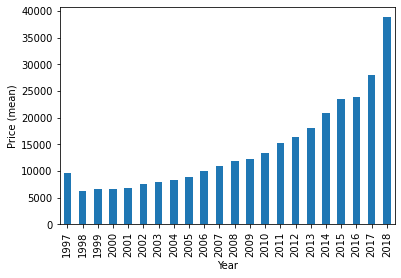

In [9]:
df.groupby('Year')['Price'].mean().plot(kind='bar') 
plt.ylabel('Price (mean)') # добавляем подпись на оси Оу
plt.show()

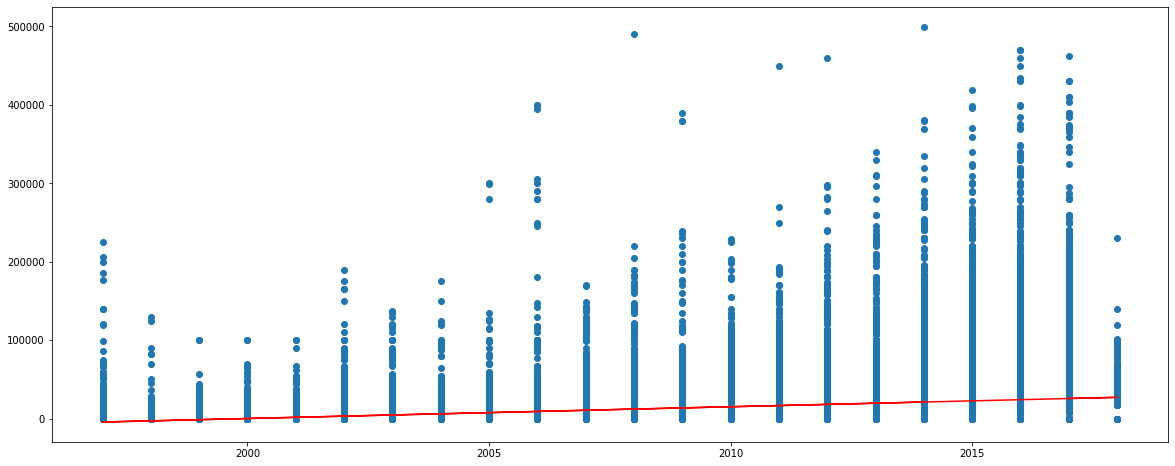

In [10]:
plt.figure(figsize=(20, 8))
x = df.Year
y = df.Price

stats = linregress(x, y)

m = stats.slope
b = stats.intercept
plt.scatter(x, y)
plt.plot(x, m * x + b, 'red')
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Price'>

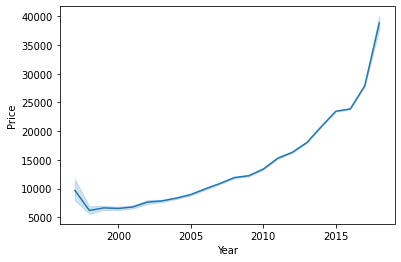

In [11]:
sns.lineplot(data=df, x="Year", y="Price")

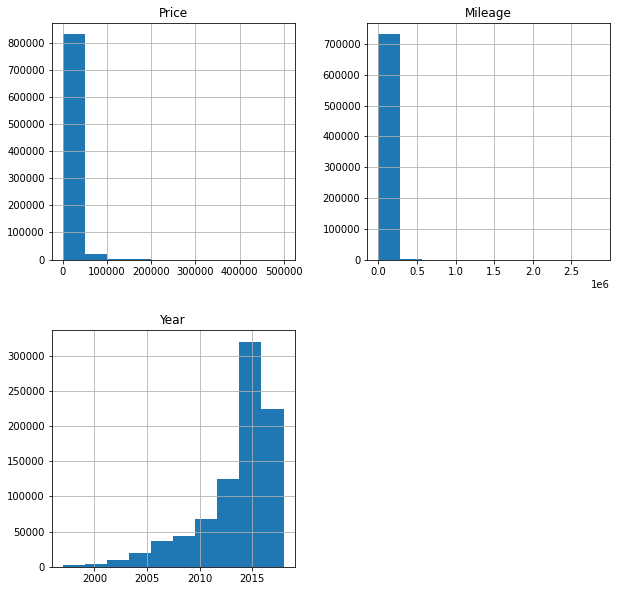

In [12]:
features = list(set(df.columns))

df[features].hist(figsize=(10,10));

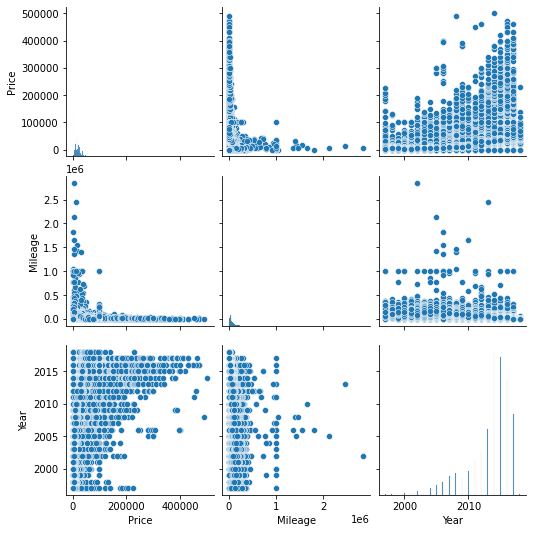

In [13]:
sns.pairplot(df[features]);

Разделим данные. 70% для тренировки и 30 процентов для теста

In [14]:
X = df.drop(columns = [''])
y = df['']
train, test = train_test_split(df, test_size=0.30, random_state=42)

In [15]:
train = train.sort_index()
train

,Price,Year,Mileage,Make,Model
1,10888,2013,NaN,Acura,ILX5-Speed
2,8995,2013,48851.0,Acura,ILX6-Speed
3,10999,2014,39922.0,Acura,ILX5-Speed
4,0,2016,NaN,Acura,ILXAutomatic
5,7989,2012,NaN,Acura,TSXAutomatic
...,...,...,...,...,...
852116,54995,2017,2474.0,Volvo,NaN
852117,63215,2017,9.0,Volvo,S90T6
852118,72260,2017,3201.0,Volvo,XC90T6
852120,60240,2017,3005.0,Volvo,V90


In [16]:
test = test.sort_index()
test

,Price,Year,Mileage,Make,Model
0,8995,2014,35725.0,Acura,ILX6-Speed
6,14490,2014,34032.0,Acura,TSXSpecial
7,13995,2013,32384.0,Acura,TSX5-Speed
12,7750,2009,91980.0,Acura,NaN
14,13999,2013,35035.0,Acura,TSX5-Speed
...,...,...,...,...,...
852109,61498,2017,4559.0,Volvo,V90
852111,46500,2017,8.0,Volvo,V60T5
852113,63995,2017,4304.0,Volvo,NaN
852114,53855,2017,7530.0,Volvo,NaN


In [88]:
import numpy as np
from sklearn import preprocessing 
pd.options.mode.chained_assignment = None

# take the info
X = train[['Year', 'Mileage', 'Make', 'Model']]
y = train[['Price']]

X.Make = label_encoder.fit_transform(X.Make.tolist())
X.Model = label_encoder.fit_transform(X.Model.tolist())

# delete NaN
X.fillna(X.mean(), inplace = True)
y.fillna(y.mean(), inplace = True)

# Scaling sklearn
scaling = preprocessing.MinMaxScaler()
X[['Mileage']] = scaling.fit_transform(X[['Mileage']])
X[['Year']] = scaling.fit_transform(X[['Year']])

model = linear_model.LinearRegression()
model.fit(X, y)
X

,Year,Mileage,Make,Model
1,0.761905,0.021370,1,1128
2,0.761905,0.019874,1,1129
3,0.809524,0.016241,1,1128
4,0.904762,0.021370,1,1131
5,0.714286,0.021370,1,2136
...,...,...,...,...
852116,0.952381,0.001005,56,2585
852117,0.952381,0.000002,56,1933
852118,0.952381,0.001300,56,2441
852120,0.952381,0.001221,56,2282


In [95]:
from sklearn.metrics import mean_squared_error

predict = model.predict(X)
mean_squared_error(y, predict, squared = False)

12996.08603841437